Objective: The objective is to present the insights for earthquake data set through visualization. Thia data set contains different information regading all the earthquakes occured in last 30 days (from the day I downloded the data)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

first I am loading data and seeing first 5 rows.

In [ ]:

data =pd.read_csv('all_month.csv')
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-24T02:21:41.496Z,32.377000,-101.471000,5.00,1.20,ml,6.0,232.0,0.100000,0.80,...,2025-05-24T02:23:56.384Z,"14 km N of Big Spring, Texas",earthquake,0.00,NaN,0.300,6.0,automatic,tx,tx
1,2025-05-24T02:07:34.440Z,38.834667,-122.818665,1.86,0.40,md,8.0,89.0,0.013100,0.01,...,2025-05-24T02:09:10.580Z,"8 km NNW of The Geysers, CA",earthquake,0.44,1.26,0.240,9.0,automatic,nc,nc
2,2025-05-24T01:55:04.430Z,38.814499,-122.832497,1.46,0.76,md,7.0,137.0,0.006192,0.01,...,2025-05-24T02:27:16.322Z,"8 km NW of The Geysers, CA",earthquake,0.44,0.85,0.090,10.0,automatic,nc,nc
3,2025-05-24T01:54:13.580Z,38.834667,-122.818169,1.77,0.78,md,14.0,87.0,0.012910,0.01,...,2025-05-24T02:17:22.249Z,"8 km NNW of The Geysers, CA",earthquake,0.30,0.69,0.150,17.0,automatic,nc,nc
4,2025-05-24T01:26:58.060Z,33.501333,-116.507833,12.02,0.87,ml,31.0,57.0,0.079130,0.14,...,2025-05-24T01:30:27.655Z,"16 km ESE of Anza, CA",earthquake,0.18,0.41,0.127,26.0,automatic,ci,ci


I have explained below what different columns mean.

Column Name	 Description
time:   Date and time when the earthquake occurred (in UTC).
latitude:   Latitude of the earthquake's epicenter (north–south position).
longitude:  Longitude of the earthquake's epicenter (east–west position).
depth:  Depth of the earthquake focus in kilometers.
mag:    Magnitude of the earthquake (e.g., Richter or Moment Magnitude).
magType:    Type of magnitude scale used (e.g., ml, mb, mw).
nst:    Number of seismic stations that reported data for this event.
gap:  Azimuthal gap in degrees — indicates data coverage around the epicenter.
dmin:	Minimum distance to a seismic station (in degrees).
rms:	Root Mean Square of time residuals in seconds — measures location error.
net:	Network code of the agency reporting the earthquake (e.g., us, ci).
id:	    Unique identifier for the earthquake event.
updated:	Time when the record was last updated.
place:	Human-readable location name (e.g., “5km NW of Napa, CA”).
type:	Type of seismic event (e.g., earthquake, quarry blast).
horizontalError:	Estimated horizontal error in kilometers.
depthError: 	Estimated error in depth measurement.
magError:	Estimated error in magnitude.
magNst: 	Number of stations used to compute the magnitude.
status: 	Processing status — automatic (by algorithm) or reviewed (by expert).
locationSource: 	Network or agency that determined the event location.
magSource:  	Network or agency that provided the magnitude estimate.


Checking no. of rows and column in data set

In [20]:
data.shape

(9229, 22)

Now I am observing data types of different columns. We can see below that time column is not in datetime datatype.

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9229 non-null   object 
 1   latitude         9229 non-null   float64
 2   longitude        9229 non-null   float64
 3   depth            9229 non-null   float64
 4   mag              9229 non-null   float64
 5   magType          9229 non-null   object 
 6   nst              7757 non-null   float64
 7   gap              7757 non-null   float64
 8   dmin             7735 non-null   float64
 9   rms              9228 non-null   float64
 10  net              9229 non-null   object 
 11  id               9229 non-null   object 
 12  updated          9229 non-null   object 
 13  place            9229 non-null   object 
 14  type             9229 non-null   object 
 15  horizontalError  7182 non-null   float64
 16  depthError       9221 non-null   float64
 17  magError      

Checking null values.

In [ ]:

data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1472
gap                1472
dmin               1494
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2047
depthError            8
magError           1494
magNst             1473
status                0
locationSource        0
magSource             0
dtype: int64

Next, I want to explore the statistical summary of the dataset's columns.

In [ ]:

data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9229.000000,9229.000000,9229.000000,9229.000000,7757.000000,7757.000000,7735.000000,9228.000000,7182.000000,9221.000000,7735.000000,7756.000000
mean,38.316722,-111.151389,21.888248,1.530567,23.320871,110.481002,0.507022,0.257942,1.723729,2.333404,0.174403,18.433987
std,20.408104,64.966951,52.873549,1.324211,23.151502,63.360007,2.068393,0.266421,3.259431,5.426043,0.102231,29.455149
min,-63.205500,-179.989300,-3.470000,-2.030000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.776833,-150.037900,2.780000,0.720000,9.000000,65.000000,0.013165,0.070000,0.260000,0.430000,0.105000,7.000000
50%,38.815166,-122.091667,7.138100,1.330000,17.000000,92.000000,0.050090,0.160000,0.430000,0.700000,0.160000,12.000000
75%,51.702200,-112.517833,14.300000,2.000000,28.000000,144.000000,0.123150,0.370000,0.926881,1.680000,0.220000,21.000000
max,82.449700,179.948000,629.500000,7.400000,475.000000,359.000000,38.532000,1.590000,41.690000,62.390000,1.360000,684.000000


Next, I want to see the correlation between different features and magnitude of earthquakes by making a heatmap by using seaborn.

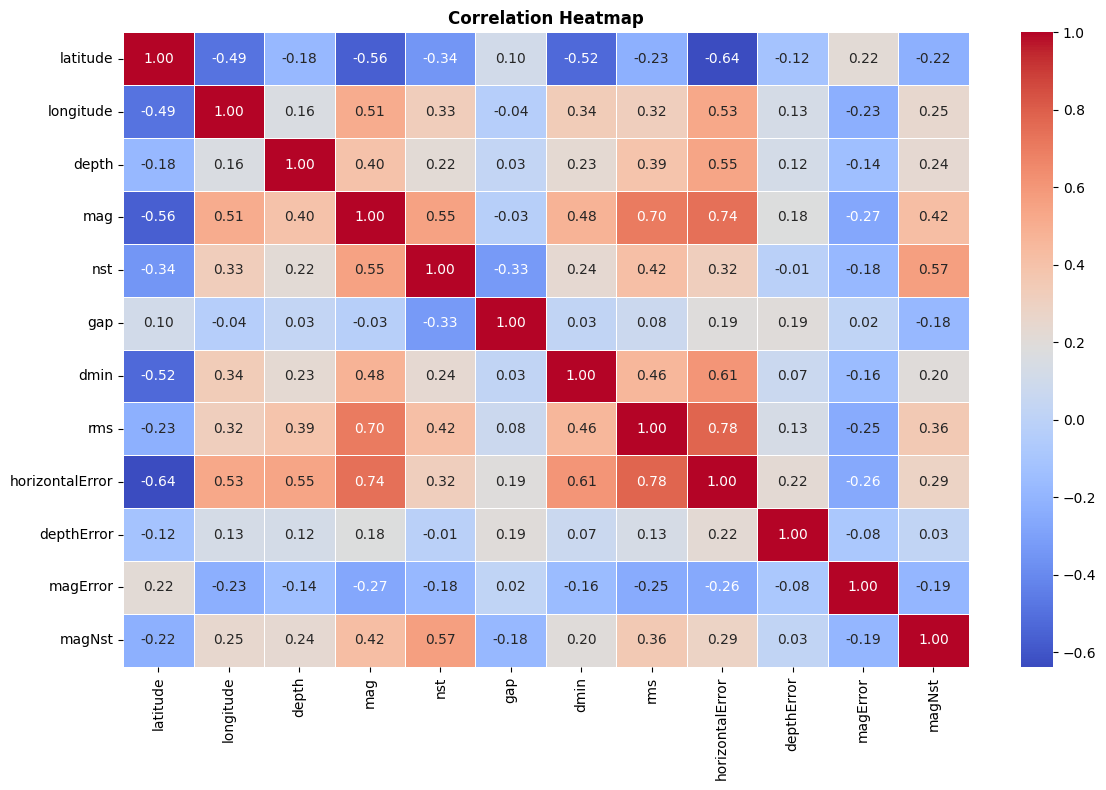

In [28]:
# 1. Compute the correlation matrix
corr_df=data.select_dtypes(include='number').corr()

# 2. Set up the figure size
plt.figure(figsize=(12, 8))

# 3. Create the heatmap
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 4. Title
plt.title('Correlation Heatmap', fontweight='bold')
plt.tight_layout()

I want to view now the data distribution of different numeric columns.

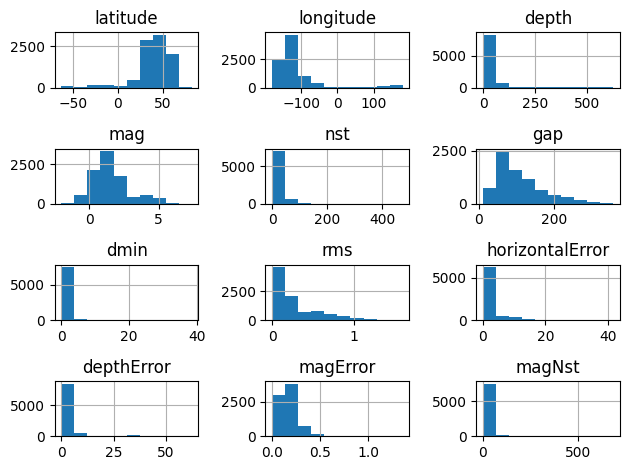

In [30]:
data.select_dtypes(include='number').hist()
plt.tight_layout()

I would like to know which magnitude of earthquake is very common. It's clear from graph below that earthquake magnitude ranging 
0.5 to 2.5 are the most common occured earthquakes. 

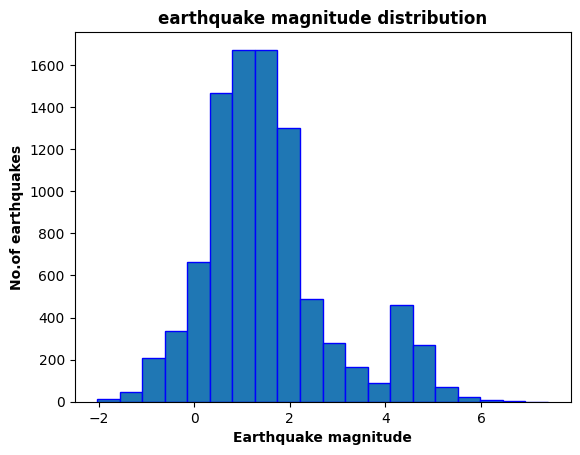

In [52]:

plt.hist(data['mag'],edgecolor='blue', bins=20)
plt.xlabel('Earthquake magnitude', fontweight='bold')
plt.ylabel('No.of earthquakes', fontweight='bold')
plt.title('earthquake magnitude distribution',fontweight='bold');

Next, I want to know which network is reporting maximum number of earthquakes. Graph below is showing clearly that nc (	Northern California Seismic System) is the one.

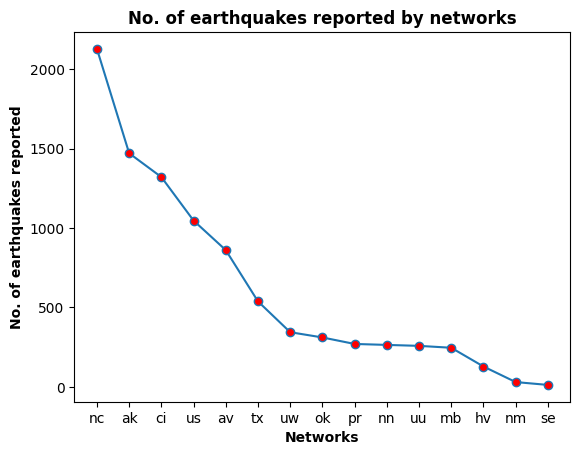

In [81]:
location=data['locationSource'].value_counts().reset_index()

fig, ax =plt.subplots()
ax.plot(location['locationSource'], location['count'], marker='o', mfc='r')
ax.set_xlabel('Networks',fontweight='bold')
ax.set_ylabel('No. of earthquakes reported', fontweight='bold')
ax.set_title('No. of earthquakes reported by networks',fontweight='bold');



I want to view which area/location is experiencing maximum earthquakes. The area with lots of red dots together are the location experiencing lots of earthquakes (graph below)

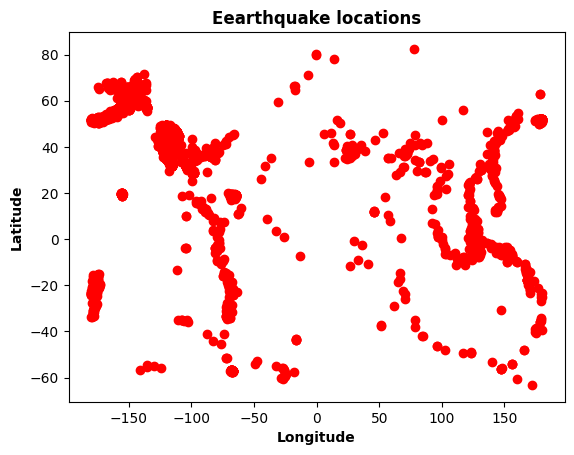

In [55]:
#getting insight of earthquakes across diferrent longitude and latitude 
fig, ax= plt.subplots()
ax.scatter(data['longitude'], data['latitude'], color='red')
ax.set_xlabel('Longitude',fontweight='bold')
ax.set_ylabel('Latitude',fontweight='bold')
ax.set_title('Eearthquake locations',fontweight='bold');


To know about outlies, I have plotted boxplot of earthquakes magnitude. We can see from the plot that there are lots of outliers.
we can also observe that magnitude has negative values as well (Explained below).

Earthquake magnitude is logarithmic, not linear. The scale is based on:

𝑀=log10(𝐴)+correction factor

M = magnitude
A = amplitude of seismic waves

If the amplitude A is very small (less than the baseline reference), the resulting log10(A) becomes negative → leading to a negative magnitude.

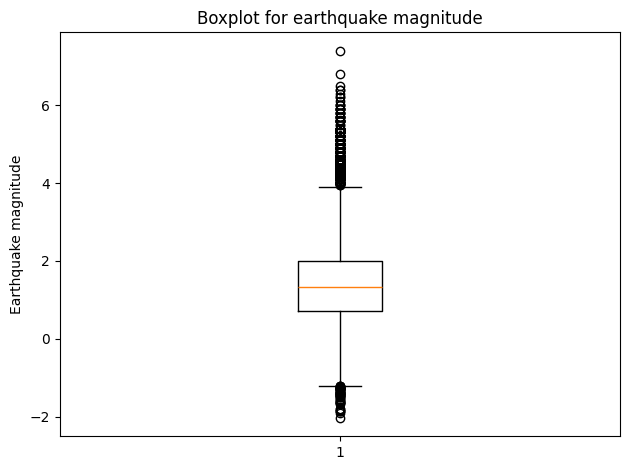

In [12]:
# checking max, min, mean and outlier by box ploting earthquake magnitude
fig, ax= plt.subplots()
ax.boxplot(data['mag'])
ax.set_ylabel('Earthquake magnitude')
ax.set_title('Boxplot for earthquake magnitude')
fig.tight_layout()


Now I want to check what are the different methods of calculating magnitude and which are the top 4 methods.

In [ ]:
# checking how poplular are diferrent methods of calculating magnitude
mag_type1 = data['magType'].value_counts().reset_index()
mag_type1

,magType,count
0,ml,5767
1,md,2566
2,mb,763
3,mww,81
4,mwr,24
5,mb_lg,11
6,mw,10
7,mh,4
8,mwb,1
9,mlv,1


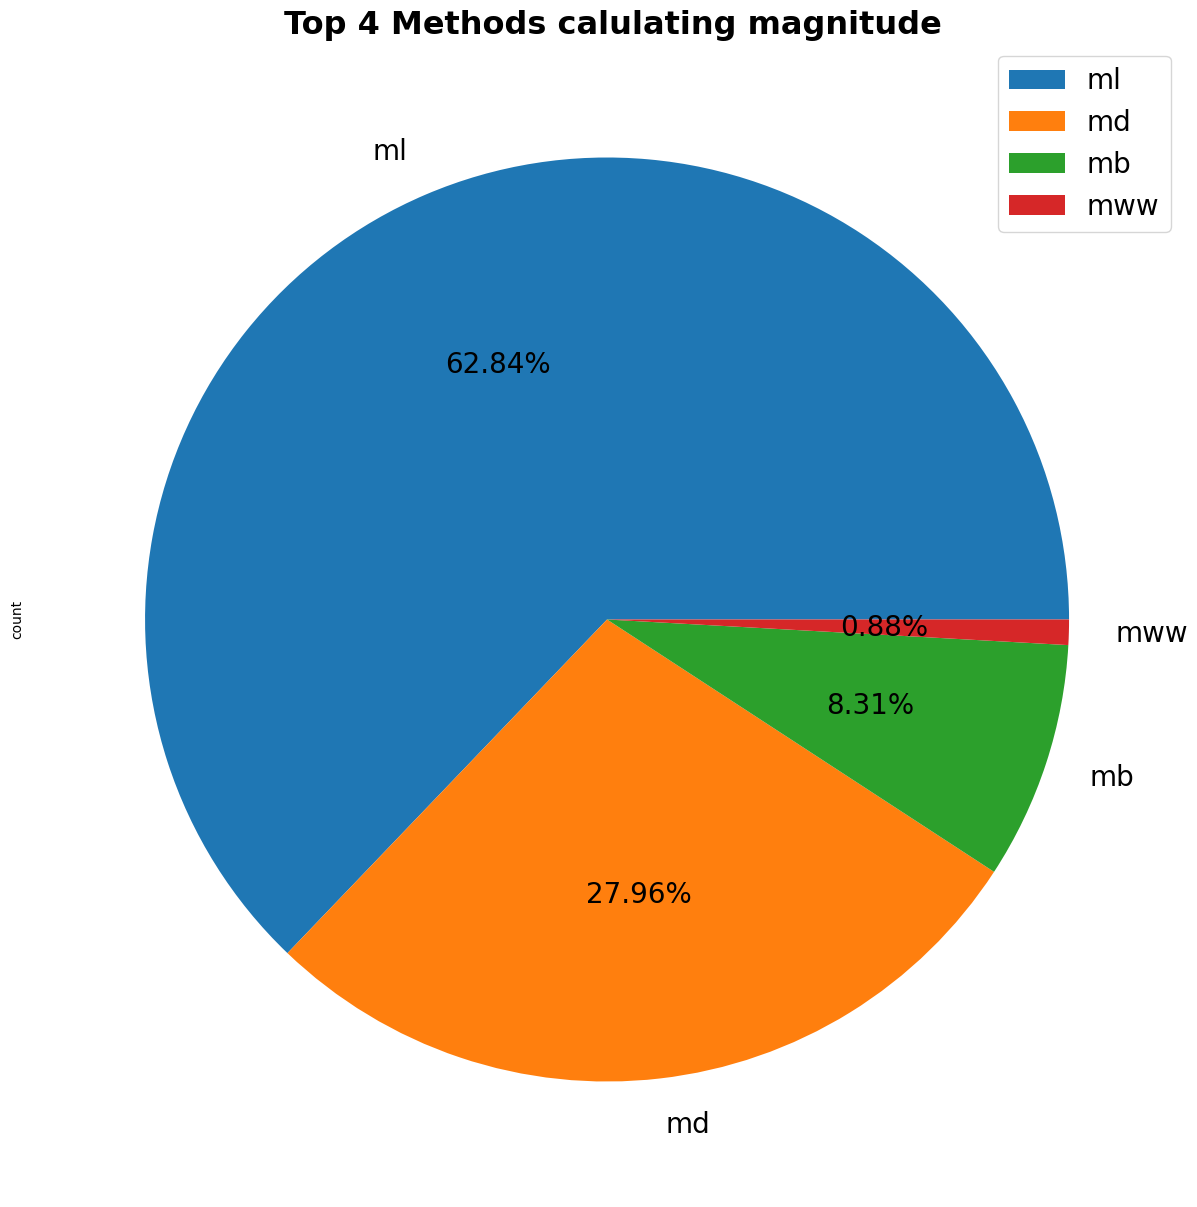

In [89]:
# to know top 4 methods used to calculate magnitude
fig, ax = plt.subplots()
mag_type1[0:4].plot(kind='pie', y = 'count', labels = mag_type1['magType'], autopct = '%.2f%%', ax=ax, figsize=(15, 15), fontsize= 20)
ax.set_title(' Top 4 Methods calulating magnitude',fontweight='bold', fontsize=23)
ax.legend(fontsize= 20);

In the graph below, I have shown top 10 places experienced highest earthquake magnitude.


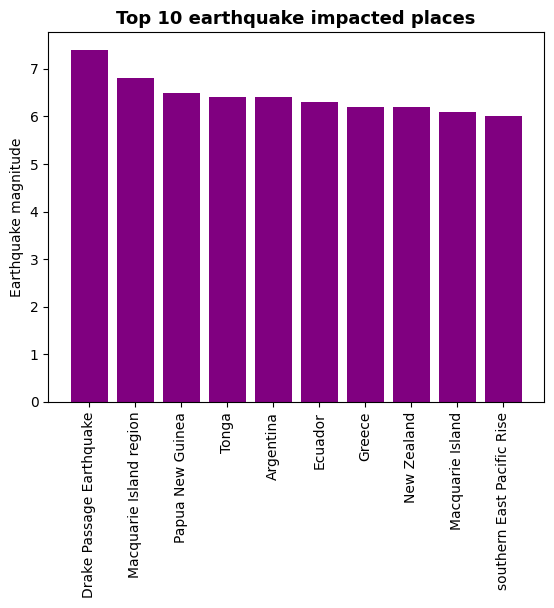

In [87]:
#calculating top 10 countries experienced highest earthquake
top_mag_palce=data.sort_values(by='mag', ascending=False).head(10)

#removing unneccesary text from location name
top_mag_palce['place']=['2025 Drake Passage Earthquake'[5:],'Macquarie Island region','88 km ENE of Angoram, Papua New Guinea'[-16:],'137 km W of Neiafu, Tonga'[-5:], '288 km SSE of Ushuaia, Argentina'[-9:],
'15 km NE of Esmeraldas, Ecuador'[-7:],'61 km NNE of Eloúnda, Greece'[-6:],'285 km SW of Bluff, New Zealand'[-11:],'west of Macquarie Island'[8:], 'southern East Pacific Rise']

fig,ax=plt.subplots()
ax.bar(top_mag_palce['place'],top_mag_palce['mag'], color='purple')
ax.set_xticks(range(10))
ax.set_xticklabels(top_mag_palce['place'],rotation=90)
ax.set_title("Top 10 earthquake impacted places", fontsize=13, fontweight='bold')
ax.set_ylabel('Earthquake magnitude');


Now I am plotting number of earthquakes per month and per day. In May, there were more earthquakes than April.

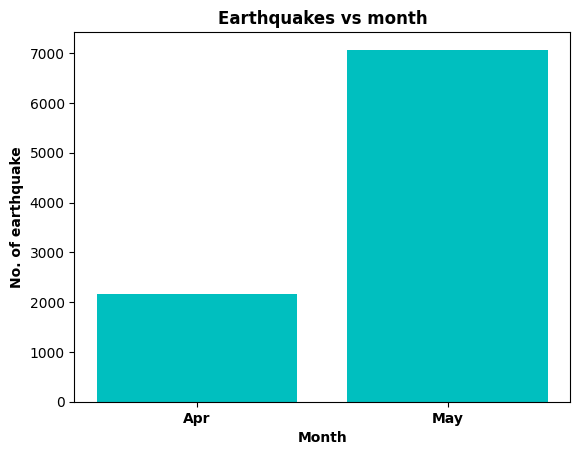

In [ ]:
data['month']=pd.to_datetime(data['time']).dt.month
df1=data.month.value_counts().reset_index()

plt.bar(df1['month'],df1['count'], color='c')
plt.xticks([4,5],['Apr','May'], fontweight='bold')
plt.xlabel('Month',fontweight='bold')
plt.ylabel('No. of earthquakes',fontweight='bold')
plt.title('Earthquakes vs month',fontweight='bold');

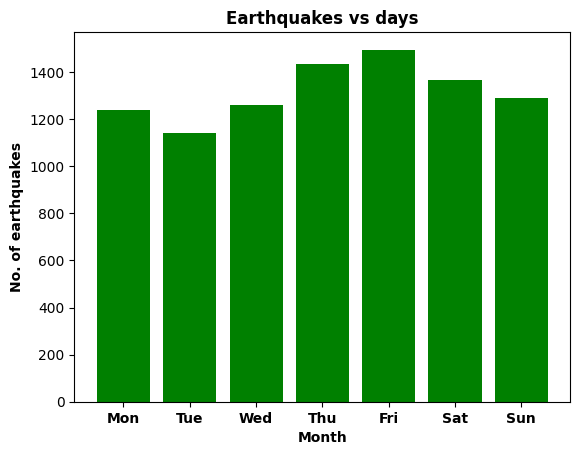

In [88]:
data['days']=pd.to_datetime(data['time']).dt.weekday
df2=data.days.value_counts().reset_index()

plt.bar(df2['days'],df2['count'], color='g')
plt.xticks(range(7),['Mon','Tue', 'Wed', 'Thu','Fri','Sat', 'Sun'], fontweight='bold')
plt.xlabel('Month',fontweight='bold')
plt.ylabel('No. of earthquakes',fontweight='bold')
plt.title('Earthquakes vs days',fontweight='bold');